In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


In [8]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [9]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [10]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

<AxesSubplot:ylabel='None'>

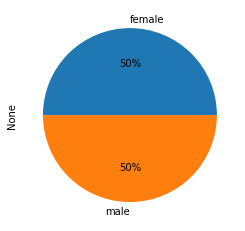

In [23]:
df.groupby('label').size().plot(kind='pie', autopct='%1.0f%%')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)                                                       
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
def gen_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix = \n',cm)
    print('Classification Report = \n',classification_report(ytest,ypred))
    print('Acc Score = ',accuracy_score(ytest,ypred))
    
def tt_score(model):
    print('Training Score = ', model.score(x_train,y_train))
    print('Testing Score = ', model.score(x_test,y_test))

# Building models

### a. Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
m1 = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=12)
m1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=12)

In [125]:
tt_score(m1)

Training Score =  0.9928966061562746
Testing Score =  0.9668769716088328


In [126]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

['female' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' 'ma

In [127]:
gen_metrics(y_test,ypred_m1)

Confusion Matrix = 
 [[310  14]
 [  7 303]]
Classification Report = 
               precision    recall  f1-score   support

      female       0.98      0.96      0.97       324
        male       0.96      0.98      0.97       310

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Acc Score =  0.9668769716088328


### b. Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
m2 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=9,min_samples_split=15)
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=15,
                       n_estimators=50)

In [165]:
tt_score(m2)

Training Score =  0.9925019731649566
Testing Score =  0.973186119873817


In [166]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

['female' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'female'
 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'male'
 'male' '

In [167]:
gen_metrics(y_test,ypred_m2)

Confusion Matrix = 
 [[315   9]
 [  8 302]]
Classification Report = 
               precision    recall  f1-score   support

      female       0.98      0.97      0.97       324
        male       0.97      0.97      0.97       310

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Acc Score =  0.973186119873817


### c. KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
m3 = KNeighborsClassifier(n_neighbors=15)
m3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [153]:
tt_score(m3)

Training Score =  0.744277821625888
Testing Score =  0.7003154574132492


In [154]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

['female' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'male'
 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'male' 'female

In [155]:
gen_metrics(y_test,ypred_m3)

Confusion Matrix = 
 [[201 123]
 [ 67 243]]
Classification Report = 
               precision    recall  f1-score   support

      female       0.75      0.62      0.68       324
        male       0.66      0.78      0.72       310

    accuracy                           0.70       634
   macro avg       0.71      0.70      0.70       634
weighted avg       0.71      0.70      0.70       634

Acc Score =  0.7003154574132492


### d. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [24]:
m4 = LogisticRegression(max_iter=1000,solver='liblinear')
m4.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [25]:
tt_score(m4)

Training Score =  0.9116022099447514
Testing Score =  0.8990536277602523


In [26]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

['female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female'
 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'
 

In [27]:
gen_metrics(y_test,ypred_m4)

Confusion Matrix = 
 [[269  55]
 [  9 301]]
Classification Report = 
               precision    recall  f1-score   support

      female       0.97      0.83      0.89       324
        male       0.85      0.97      0.90       310

    accuracy                           0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634

Acc Score =  0.8990536277602523


### e. SVM Classifier

In [64]:
from sklearn.svm import SVC

In [160]:
m5 = SVC(kernel='linear',C=10)
m5.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [161]:
tt_score(m5)

Training Score =  0.9727703235990529
Testing Score =  0.9700315457413249


In [162]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

['female' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'female'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female' 'male'
 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' '

In [163]:
gen_metrics(y_test,ypred_m5)

Confusion Matrix = 
 [[313  11]
 [  8 302]]
Classification Report = 
               precision    recall  f1-score   support

      female       0.98      0.97      0.97       324
        male       0.96      0.97      0.97       310

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Acc Score =  0.9700315457413249


# <font color='red'>Conclusion</font>

### <u>Random Forest Classifier</u> is the best performing model in terms of accuracy (97.3%).<br>